# Resultados de entrenamiento sobre datasets CT con anotaciones de tumor
- Tabla con datasets
- Pipeline: [nnUNet](https://github.com/MIC-DKFZ/nnUNet)
- Resultados sobre fold 0

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pathlib import Path

In [2]:
def get_df_from_summary(path_to_summary, dataset):
    """Return a pandas dataframe from the 'summary.json' file."""
    with open(path_to_summary, 'r') as fp:
        summary = json.load(fp)
    if dataset == "task03":
        results_task03_liver = [
            {
                "dataset": "task03-liver",
                "patient": Path(item["prediction_file"]).name,
                "foreground": "liver",
                **item["metrics"]["1"]
            }
            for item in summary["metric_per_case"]
        ]
        results_task03_tumor = [
            {
                "dataset": "task03-liver",
                "patient": Path(item["prediction_file"]).name,
                "foreground": "tumor",
                **item["metrics"]["2"]
            }
            for item in summary["metric_per_case"]
        ]
        results_task03_liver = pd.DataFrame(results_task03_liver)
        results_task03_tumor = pd.DataFrame(results_task03_tumor)
        results = pd.concat([results_task03_liver, results_task03_tumor])
        results.reset_index(inplace=True, drop=True)
    elif dataset == "task06":
        results = [
            {
                "dataset": "task06-lung",
                "patient": Path(item["prediction_file"]).name,
                "foreground": "tumor",
                **item["metrics"]["1"]
            }
            for item in summary["metric_per_case"]
        ]
        results = pd.DataFrame(results)
    elif dataset == "task07":
        results_task07_pancreas = [
            {
                "dataset": "task07-pancreas",
                "patient": Path(item["prediction_file"]).name,
                "foreground": "pancreas",
                **item["metrics"]["1"]
            }
            for item in summary["metric_per_case"]
        ]
        results_task07_tumor = [
            {
                "dataset": "task07-pancreas",
                "patient": Path(item["prediction_file"]).name,
                "foreground": "tumor",
                **item["metrics"]["2"]
            }
            for item in summary["metric_per_case"]
        ]
        results_task07_pancreas = pd.DataFrame(results_task07_pancreas)
        results_task07_tumor = pd.DataFrame(results_task07_tumor)
        results = pd.concat([results_task07_pancreas, results_task07_tumor])
        results.reset_index(inplace=True, drop=True)
    elif dataset == "task10":
        results = [
            {
                "dataset": "task10-colon",
                "patient": Path(item["prediction_file"]).name,
                "foreground": "tumor",
                **item["metrics"]["1"]
            }
            for item in summary["metric_per_case"]
        ]
        results = pd.DataFrame(results)
    elif dataset == "kits19":
        results_kits19_kidney = [
            {
                "dataset": "kits19-kidney",
                "patient": Path(item["prediction_file"]).name,
                "foreground": "kidney",
                **item["metrics"]["1"]
            }
            for item in summary["metric_per_case"]
        ]
        results_kits19_tumor = [
            {
                "dataset": "kits19-kidney",
                "patient": Path(item["prediction_file"]).name,
                "foreground": "tumor",
                **item["metrics"]["2"]
            }
            for item in summary["metric_per_case"]
        ]
        results_kits19_kidney = pd.DataFrame(results_kits19_kidney)
        results_kits19_tumor = pd.DataFrame(results_kits19_tumor)
        results = pd.concat([results_kits19_kidney, results_kits19_tumor])
        results.reset_index(inplace=True, drop=True)
    else:
        raise ValueError("Invalid 'dataset' argument.")
    return results

In [3]:
path_to_task03 = Path('resources/summary_task03_liver_CTAbdomen_fold0.json')
path_to_task06 = Path('resources/summary_task06_lung_CTAbdomen_fold0.json')
path_to_task07 = Path('resources/summary_task07_pancreas_CTAbdomen_fold0.json')
path_to_task10 = Path('resources/summary_task10_colon_CTAbdomen_fold0.json')
path_to_kits19 = Path('resources/summary_kits19_kidney_CTAbdomen_fold0.json')
datasets = {
    "task03-liver": {"alias": "task03", "path": path_to_task03},
    "task06-lung": {"alias": "task06", "path": path_to_task06},
    "task07-pancreas": {"alias": "task07", "path": path_to_task07},
    "task10-liver": {"alias": "task10", "path": path_to_task10},
    "kits19-kidney": {"alias": "kits19", "path": path_to_kits19}
}

In [4]:
for key, results in datasets.items():    
    result_df = get_df_from_summary(results['path'], results['alias'])
    datasets[key].update({"results_df": pd.DataFrame(result_df)})

In [5]:
all_results_df = pd.concat([dataset["results_df"] for dataset in datasets.values()])
all_results_df.groupby(['dataset', 'foreground']).describe()["Dice"]

count      mean       std       min       25%  \
dataset         foreground                                                  
kits19-kidney   kidney       42.0  0.967113  0.018016  0.897830  0.958882   
                tumor        42.0  0.832140  0.161730  0.141241  0.796071   
task03-liver    liver        27.0  0.962181  0.025716  0.852342  0.955462   
                tumor        24.0  0.699306  0.233793  0.000000  0.606344   
task06-lung     tumor        13.0  0.572838  0.294374  0.000000  0.546691   
task07-pancreas pancreas     57.0  0.818407  0.087306  0.485073  0.785109   
                tumor        57.0  0.531282  0.317521  0.000000  0.230413   
task10-colon    tumor        26.0  0.463003  0.388465  0.000000  0.000000   

                                 50%       75%       max  
dataset         foreground                                
kits19-kidney   kidney      0.971335  0.979177  0.988778  
                tumor       0.879020  0.929700  0.977570  
task03-liver    liver       0.967504  0.977817  0.984148  
                tumor       0.803453  0.842351  0.903044  
task06-lung     tumor       0.642158  0.772339  0.879937  
task07-pancreas pancreas    0.852767  0.874944  0.932668  
                tumor       0.689817  0.805233  0.914180  
task10-colon    tumor       0.686992  0.812842  0.906797

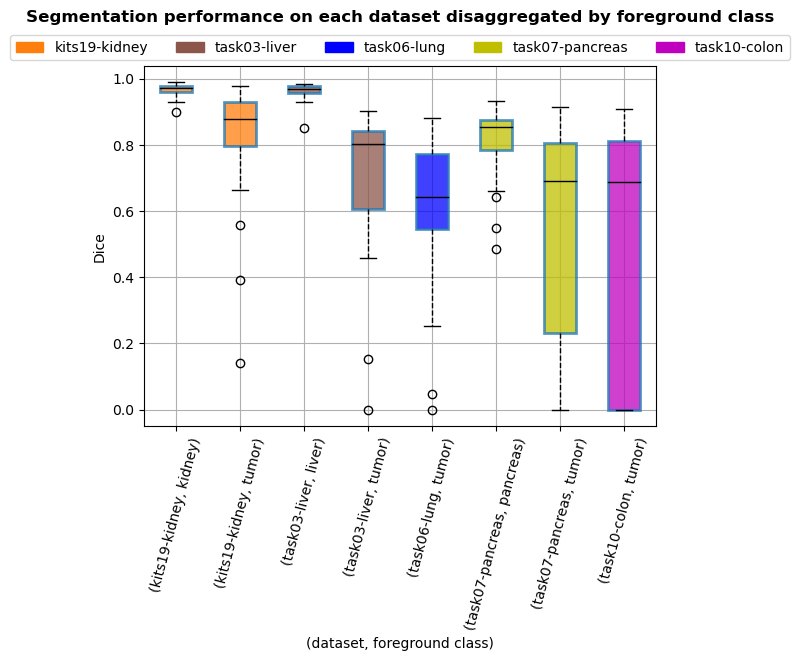

In [6]:
boxplot_dict = all_results_df.boxplot(
    column="Dice",
    by=["dataset", "foreground"],
    return_type='both',
    patch_artist=True,
    medianprops={'color': 'k', 'linewidth': 1},
    whiskerprops={'linestyle': '--'}
)
plt.suptitle('')
plt.title(
    'Segmentation performance on each dataset disaggregated by foreground class',
    x=0.5,
    y=1.1,
    fontweight='bold'
)
colors = ['tab:orange', 'tab:orange', 'tab:brown', 'tab:brown', 'b', 'y', 'y', 'm']
for row_key, (ax,row) in boxplot_dict.items():
    ax.set_xlabel('')
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(colors[i])
        box.set_alpha(0.75),
        box.set_linewidth(2)
labels = [
    'kits19-kidney',
    'task03-liver',
    'task06-lung',
    'task07-pancreas',
    'task10-colon'
]
kits19_patch = mpatches.Patch(color=colors[0])
task03_patch = mpatches.Patch(color=colors[2])
task06_patch = mpatches.Patch(color=colors[4])
task07_patch = mpatches.Patch(color=colors[6])
task10_patch = mpatches.Patch(color=colors[7])
plt.legend(
    handles=[kits19_patch, task03_patch, task06_patch, task07_patch, task10_patch],
    labels=labels,
    loc='upper center',
    ncol=5,
    bbox_to_anchor=(0.5, 1.105)
)
plt.xlabel('(dataset, foreground class)')
plt.xticks(rotation=75)
plt.ylabel('Dice')
#plt.savefig('seg_performance_all_datasets.png', bbox_inches='tight')
plt.show()

In [7]:
grouped = all_results_df.groupby(['dataset', 'foreground'])
all_results_df_sorted = grouped.apply(lambda group: group.sort_values(by='Dice', ascending=False))
#all_results_df_sorted.to_csv("summary_all.csv", index=False)